In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import classification_report,confusion_matrix

## Importing the Dataset

In [ ]:
# there are 2 datasets created 
covid_data = pd.read_csv('data.csv')
covid_data.head()

,Gender,Age Group,Religion,Living,Education,Employment Status,Which of the following best describes your current working industry?,Medical Insurance,COVID,Deaths seen,Reasons,High Vaccine cost,False News,Incubation period,Vaccination Status
0,Female,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Personal Business Owners,Yes,Did not contract COVID,Yes,To protect others,No,Yes,20 days,Partially Completed
1,Male,18-44,Hindu,Urban,Bachelor degree or higher,Student,Other,No,Was hospitalized,Yes,To protect others,Yes,No,20 days,Partially Completed
2,Male,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Other,Yes,Did not contract COVID,Yes,To protect others,No,Yes,Don't know,Partially Completed
3,Female,18-44,Hindu,Suburban,High school or equivalent,Student,Other,Yes,Did not contract COVID,Yes,To protect others,No,Yes,2-14 days,Partially Completed
4,Male,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Corporate job,Yes,Did not contract COVID,Yes,To protect others,No,No,2-14 days,Completed


In [ ]:
#Looking at the shape of data
print("Number or records:",covid_data.shape[0])
print("No of features: ",covid_data.shape[1])

Number or records: 225
No of features:  15


In [ ]:
covid_data.columns

Index(['Gender', 'Age Group', 'Religion', 'Living', 'Education',
       'Employment Status',
       'Which of the following best describes your current working industry?',
       'Medical Insurance', 'COVID', 'Deaths seen', 'Reasons',
       'High Vaccine cost', 'False News ', 'Incubation period',
       'Vaccination Status'],
      dtype='object')

In [ ]:
#Checking if the columns have any null values, returns true for columns which have null values
covid_data.isna().any()

Gender                                                                  False
Age Group                                                               False
Religion                                                                 True
Living                                                                  False
Education                                                               False
Employment Status                                                       False
Which of the following best describes your current working industry?    False
Medical Insurance                                                       False
COVID                                                                   False
Deaths seen                                                             False
Reasons                                                                 False
High Vaccine cost                                                       False
False News                                                      

<AxesSubplot:>

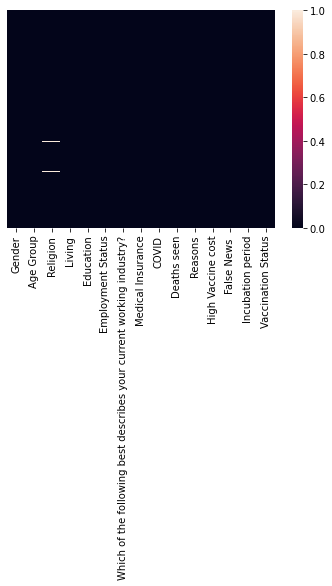

In [ ]:
#heatmap of null columns
sns.heatmap(covid_data.isnull(),yticklabels=False)

In [ ]:
#Getting the count of all null values in the data set
covid_data.isna().sum()

Gender                                                                  0
Age Group                                                               0
Religion                                                                2
Living                                                                  0
Education                                                               0
Employment Status                                                       0
Which of the following best describes your current working industry?    0
Medical Insurance                                                       0
COVID                                                                   0
Deaths seen                                                             0
Reasons                                                                 0
High Vaccine cost                                                       0
False News                                                              0
Incubation period                     

## Data Preprocessing

In [ ]:
#Replacing all NaN values with Not taken in the which vaccine have you taken column
covid_data['Religion'] = covid_data['Religion'].fillna("Hindu")

#Checking if there are any null values now:
covid_data.isna().sum()

Gender                                                                  0
Age Group                                                               0
Religion                                                                0
Living                                                                  0
Education                                                               0
Employment Status                                                       0
Which of the following best describes your current working industry?    0
Medical Insurance                                                       0
COVID                                                                   0
Deaths seen                                                             0
Reasons                                                                 0
High Vaccine cost                                                       0
False News                                                              0
Incubation period                     

<AxesSubplot:>

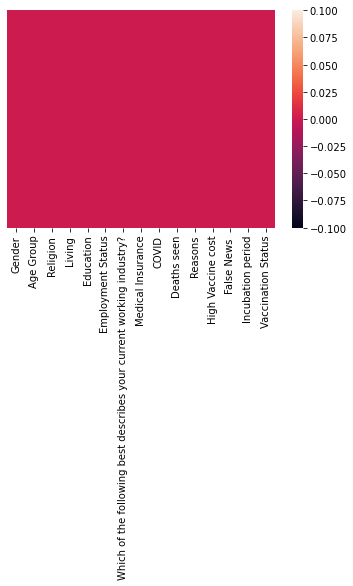

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False)

In [ ]:
print("Sample size: "+str(len(covid_data.index)))

Sample size: 225


##  Data Visualization and Analysis

<AxesSubplot:xlabel='Age Group', ylabel='count'>

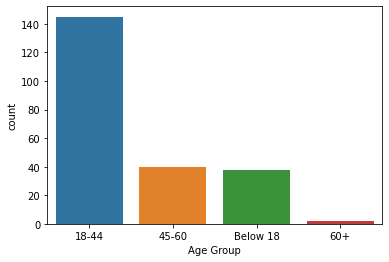

In [ ]:
#Represent people from different age groups who have answered this survey?
sns.countplot(x='Age Group',data=covid_data)

In [ ]:
#From the above graph we can notice that maximum respondents are from the age group 18-44

<AxesSubplot:xlabel='Age Group', ylabel='count'>

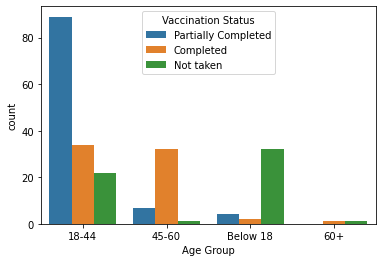

In [ ]:
#Compare and find which age group has least number of vaccinations done?
sns.countplot(x="Age Group", hue="Vaccination Status",data = covid_data)
#We can see that under 18 have the maximum Not taken because the vaccination drive for this group hasnt been officially started

<AxesSubplot:xlabel='Living', ylabel='count'>

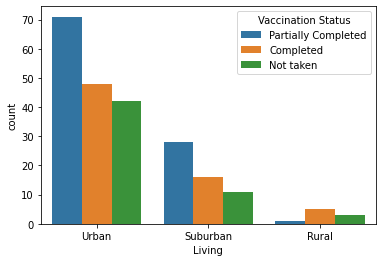

In [ ]:
# Analyze the status of vaccination of respondents based on their geographical areas?
sns.countplot(x="Living",hue="Vaccination Status",data=covid_data)
#We can see that mostly urban living people go for vacination

<AxesSubplot:xlabel='Medical Insurance', ylabel='count'>

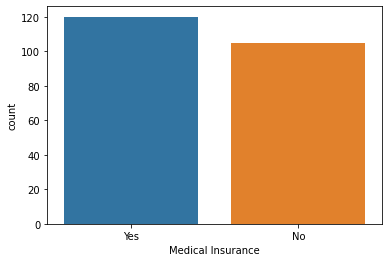

In [ ]:
#Does the work industry affect the ability of a person to buy medical insurance?
sns.countplot(x="Medical Insurance",data=covid_data)

<AxesSubplot:xlabel='Medical Insurance', ylabel='count'>

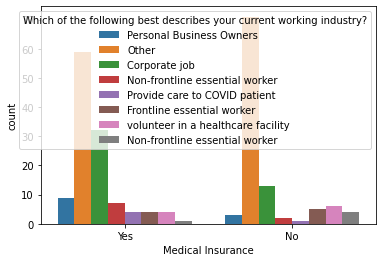

In [ ]:
sns.countplot(x="Medical Insurance",hue="Which of the following best describes your current working industry?",data=covid_data)

<AxesSubplot:xlabel='Deaths seen', ylabel='count'>

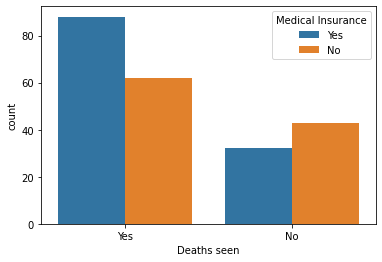

In [ ]:
sns.countplot(x="Deaths seen",hue="Medical Insurance",data=covid_data)
#It is noticed that many people have seen COVID related deaths but still almost half donot invest in medical insurance

<AxesSubplot:xlabel='Medical Insurance', ylabel='count'>

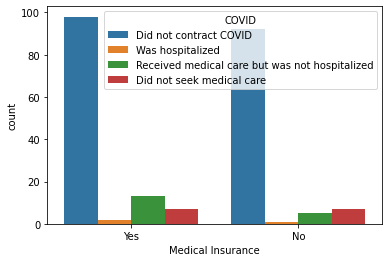

In [ ]:
#Is medical insurance related to contracting COVID?
sns.countplot(x="Medical Insurance",hue="COVID",data=covid_data)
#Medical insurance may or may not be related to contracting covid as almost the same amount of people have and donot have medical insurance in the dataset taken

<AxesSubplot:xlabel='count', ylabel='Vaccination Status'>

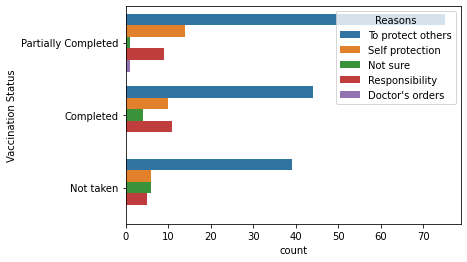

In [ ]:
#What is the major motive to get vaccinated?
sns.countplot(y="Vaccination Status",hue="Reasons", data=covid_data)
#We can see that to protect others is the most important factor realized

<AxesSubplot:xlabel='High Vaccine cost', ylabel='count'>

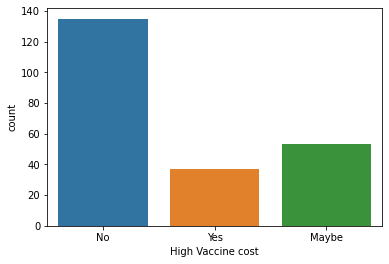

In [ ]:
#Does the cost of a vaccine prevent people from taking it?
sns.countplot(x="High Vaccine cost",data=covid_data)
#majorly, the cost of a vaccine doesnt prevent people from taking it

<AxesSubplot:xlabel='False News ', ylabel='count'>

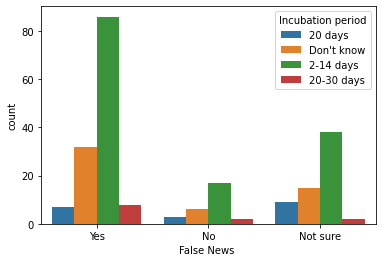

In [ ]:
#Is there a false information trend created due to excessive fear of COVID which leads to people not knowing basic facts like the incubation period of covid is 2-14days?
sns.countplot(x="False News ", hue="Incubation period",data=covid_data)
#out of 225 people only 90 have answered this question correctly

<AxesSubplot:xlabel='Gender', ylabel='count'>

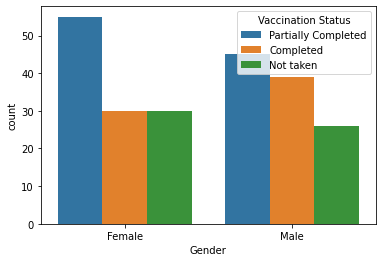

In [ ]:
#Comapre the vaccination status for males and females?
sns.countplot(x="Gender",hue="Vaccination Status",data=covid_data)
#Yes approximately all individuals are getting vaccinated

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                225 non-null    object
 1   Age Group                                                             225 non-null    object
 2   Religion                                                              225 non-null    object
 3   Living                                                                225 non-null    object
 4   Education                                                             225 non-null    object
 5   Employment Status                                                     225 non-null    object
 6   Which of the following best describes your current working industry?  225 non-null    object
 7   Medical 

In [ ]:
#splitting the data into features and target value
X = covid_data.iloc[:,:-1]
X.head()

,Gender,Age Group,Religion,Living,Education,Employment Status,Which of the following best describes your current working industry?,Medical Insurance,COVID,Deaths seen,Reasons,High Vaccine cost,False News,Incubation period
0,Female,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Personal Business Owners,Yes,Did not contract COVID,Yes,To protect others,No,Yes,20 days
1,Male,18-44,Hindu,Urban,Bachelor degree or higher,Student,Other,No,Was hospitalized,Yes,To protect others,Yes,No,20 days
2,Male,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Other,Yes,Did not contract COVID,Yes,To protect others,No,Yes,Don't know
3,Female,18-44,Hindu,Suburban,High school or equivalent,Student,Other,Yes,Did not contract COVID,Yes,To protect others,No,Yes,2-14 days
4,Male,18-44,Hindu,Urban,Bachelor degree or higher,Working both remotely and in person,Corporate job,Yes,Did not contract COVID,Yes,To protect others,No,No,2-14 days


In [ ]:
Y = covid_data.iloc[:,-1]
Y.head()

0    Partially Completed
1    Partially Completed
2    Partially Completed
3    Partially Completed
4              Completed
Name: Vaccination Status, dtype: object

## Splitting the dataset into training and test sets

In [ ]:
#Encoding X 
encoded_x = pd.get_dummies(X,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_x,Y,test_size=1/5,random_state=42)
print("Training input",x_train.shape)
print("Test split input",x_test.shape)
print("Training and testing datasets created")

Training input (180, 44)
Test split input (45, 44)
Training and testing datasets created


## Using Classification Algorithms

Classification report
                      precision    recall  f1-score   support

          Completed       0.56      0.59      0.57        17
          Not taken       0.67      0.50      0.57        16
Partially Completed       0.47      0.58      0.52        12

           accuracy                           0.56        45
          macro avg       0.56      0.56      0.55        45
       weighted avg       0.57      0.56      0.56        45



0.5555555555555556

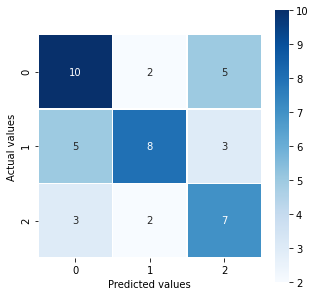

In [ ]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)

y_pred1 = classifier1.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred1))

cm1 = confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm1,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")


from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

Classification report
                      precision    recall  f1-score   support

          Completed       0.90      0.53      0.67        17
          Not taken       0.86      0.38      0.52        16
Partially Completed       0.43      1.00      0.60        12

           accuracy                           0.60        45
          macro avg       0.73      0.63      0.60        45
       weighted avg       0.76      0.60      0.60        45



0.6

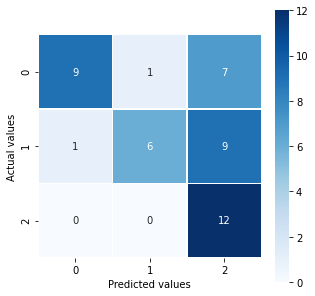

In [ ]:
#KNeighbors 
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(x_train, y_train)


y_pred2 = classifier2.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred2))

cm2 = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm2,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")


from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred2)

Classification report
                      precision    recall  f1-score   support

          Completed       0.82      0.53      0.64        17
          Not taken       0.77      0.62      0.69        16
Partially Completed       0.48      0.83      0.61        12

           accuracy                           0.64        45
          macro avg       0.69      0.66      0.65        45
       weighted avg       0.71      0.64      0.65        45



0.6444444444444445

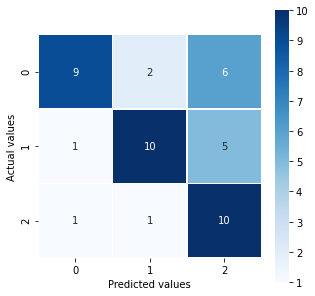

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(x_train, y_train)

y_pred3 = classifier3.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred3))


cm3 = confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm3,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

Classification report
                      precision    recall  f1-score   support

          Completed       0.80      0.47      0.59        17
          Not taken       0.83      0.62      0.71        16
Partially Completed       0.39      0.75      0.51        12

           accuracy                           0.60        45
          macro avg       0.67      0.62      0.61        45
       weighted avg       0.70      0.60      0.61        45



0.6

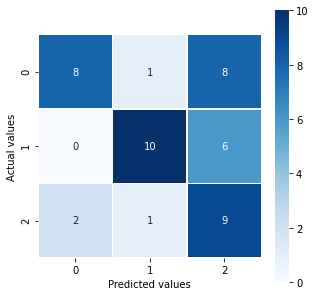

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(x_train, y_train)

y_pred4 = classifier4.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred4))


cm4 = confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm4,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

## Homogenous Ensemble Method

In [ ]:
meta = pd.DataFrame({'Decision Tree':y_pred1,'KNeighbors':y_pred2,'Logistic Regression':y_pred3,'Random Forest':y_pred4,'Actual Value':y_test})
y_pred1
meta.head()


,Decision Tree,KNeighbors,Logistic Regression,Random Forest,Actual Value
9,Partially Completed,Partially Completed,Partially Completed,Partially Completed,Completed
184,Completed,Partially Completed,Partially Completed,Partially Completed,Not taken
120,Partially Completed,Partially Completed,Partially Completed,Partially Completed,Partially Completed
207,Completed,Not taken,Not taken,Not taken,Not taken
148,Partially Completed,Partially Completed,Not taken,Partially Completed,Completed


In [ ]:
X = meta.iloc[:,:-1]
Y = meta.iloc[:,-1]
X.head()
Y.head()

9                Completed
184              Not taken
120    Partially Completed
207              Not taken
148              Completed
Name: Actual Value, dtype: object

In [ ]:
encoded_x = pd.get_dummies(X,drop_first=True)
print(encoded_x)

     Decision Tree_Not taken  Decision Tree_Partially Completed  \
9                          0                                  1   
184                        0                                  0   
120                        0                                  1   
207                        0                                  0   
148                        0                                  1   
214                        1                                  0   
182                        0                                  1   
86                         0                                  0   
178                        1                                  0   
175                        0                                  0   
68                         0                                  1   
15                         0                                  1   
200                        1                                  0   
25                         0                                  

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_x,Y,test_size=1/4,random_state=42)
print("Training input",x_train.shape)
print("Test split input",x_test.shape)
print("Training and testing datasets created")

Training input (33, 8)
Test split input (12, 8)
Training and testing datasets created


Classification report
                      precision    recall  f1-score   support

          Completed       0.00      0.00      0.00         2
          Not taken       0.71      0.71      0.71         7
Partially Completed       0.50      0.67      0.57         3

           accuracy                           0.58        12
          macro avg       0.40      0.46      0.43        12
       weighted avg       0.54      0.58      0.56        12



0.5833333333333334

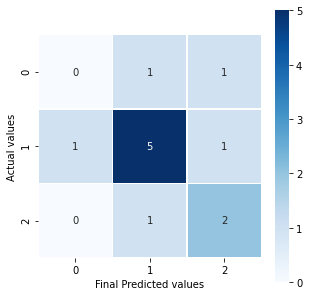

In [ ]:
predictor = LogisticRegression(random_state = 0)
predictor.fit(x_train, y_train)

y_pred = predictor.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Final Predicted values")

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#Overall precision level of other models used increased but it would be preferable to go for Logistic Regression only for our dataset as it has the highest accuracy score of 64%

## Impact of vaccination on social behaviour

In [ ]:
vaccine = pd.read_csv('vaccine.csv')
vaccine.head(6)

FileNotFoundError: ignored

In [ ]:
#Splitting data into features and labels
X = vaccine.iloc[:,:-1]
X.head()

In [ ]:
Y = vaccine.iloc[:,-1]
Y.head()

In [ ]:
#encoding X using one hot encoder
encoded_x = pd.get_dummies(X,drop_first=True)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_x,Y,test_size=1/5,random_state=42)
print("Training input",x_train.shape)
print("Test split input",x_test.shape)
print("Training and testing datasets created")

In [ ]:
X.columns

In [ ]:
X.head()

In [ ]:
#Are vaccinated people taking the precaution of wearing masks in public places?
sns.countplot(x="Wear Mask in public", hue ="Vaccination Status",data = vaccine)
# No they are still careful with wearing of masks in public places

In [ ]:
#How is vaccination impacting the usage of public transportation?
sns.catplot(x="Use public transportation",col="Vaccination Status",kind="count",data = vaccine)
#people are extremely likely to use public transportation after vaccination

In [ ]:
#What is the perceived threat level inside the house?  
sns.countplot(y="Contract COVID",hue="Inside a friends house",data = vaccine)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print("Classification report\n",classification_report(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#using logistic regression we can predict the possibility of a person contracting covid on the basis of their social behaviour with an accuracy of 97.77%